In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.utils import image_dataset_from_directory

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [ ]:
# Variables for pre-processing and training.
batch_size = 64
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3
train_data_gen = image_dataset_from_directory(
    directory=train_dir,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    )
val_data_gen = image_dataset_from_directory(
    directory=validation_dir,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    )
test_data_gen = image_dataset_from_directory(
    directory=test_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    label_mode=None,
    )


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 50 files.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_data_gen = train_data_gen.map(lambda x, y: (normalization_layer(x), y))

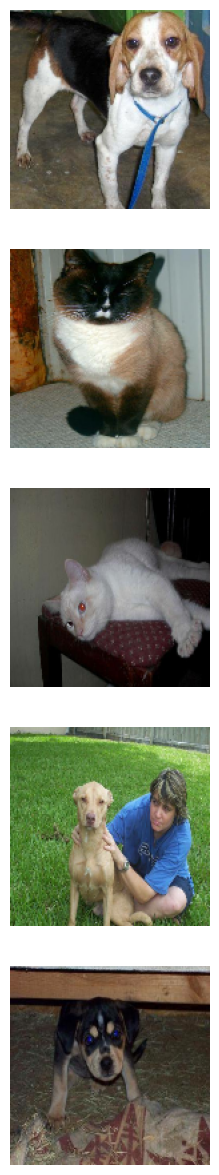

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip(images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()


sample_training_images, _ = next(iter(normalized_data_gen))
plotImages(sample_training_images[:5])


Found 2000 files belonging to 2 classes.


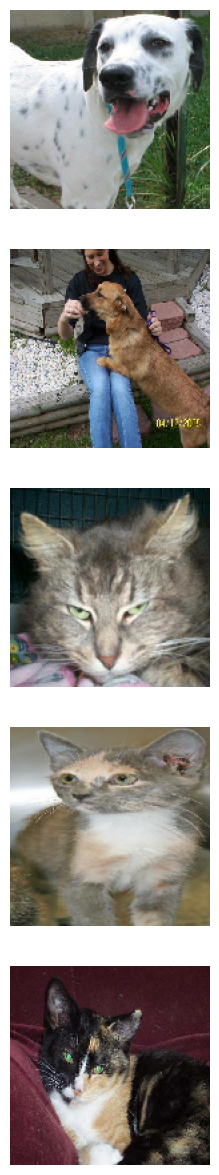

In [ ]:
# 6
train_data_gen = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

augmented_images = []
for images, labels in train_data_gen.take(1):  # Get the first batch
    for i in range(5):
        augmented_images.append(images[i].numpy())  # Convert to NumPy array

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
  layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

loss = 'binary_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)



model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         166,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,105 (723.07 KB)

 Trainable params: 185,105 (723.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data_gen = train_data_gen.cache().prefetch(buffer_size=AUTOTUNE)
val_data_gen = val_data_gen.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# 8
history = model.fit(x=train_data_gen,
                    validation_data=val_data_gen,
                    epochs=epochs,
                    steps_per_epoch=int(np.ceil(total_train / batch_size)) ,
                    validation_steps=int(np.ceil(total_val / batch_size)),
                    )

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.4871 - loss: 0.6915 - val_accuracy: 0.6290 - val_loss: 0.6844
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5711 - loss: 0.6811 - val_accuracy: 0.6130 - val_loss: 0.6677
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5847 - loss: 0.6658 - val_accuracy: 0.6460 - val_loss: 0.6497
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6316 - loss: 0.6435 - val_accuracy: 0.6680 - val_loss: 0.6270
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6514 - loss: 0.6231 - val_accuracy: 0.7090 - val_loss: 0.6086
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6576 - loss: 0.6028 - val_accuracy: 0.7100 - val_loss: 0.5977
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6732 - loss: 0.5856 - val_accuracy: 0.7090 - val_loss: 0.5902
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6902 - loss: 0.5692 - val_accuracy: 0.7080 

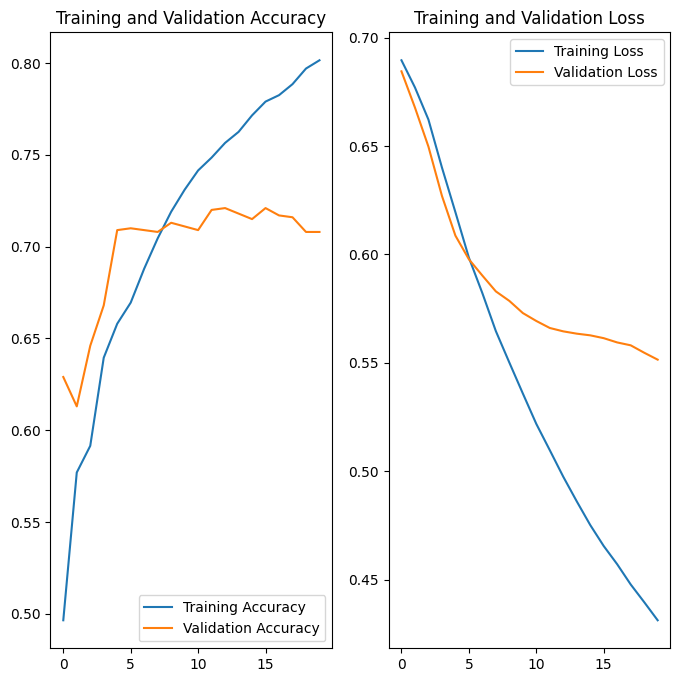

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test_data_gen)
probabilities = predictions[:, 0]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
